[[ 8  5]
 [ 4  2]
 [12 14]
 [ 3  6]
 [10  5]]

 Matriz distancia 
 [[ 0.  7. 13.  6.  2.]
 [ 7.  0. 20.  5.  9.]
 [13. 20.  0. 17. 11.]
 [ 6.  5. 17.  0.  8.]
 [ 2.  9. 11.  8.  0.]]

El numero menor es: 2.000000 y se encuentra en la fila: 4 de la columna: 0

Iteración # 1
La nueva matriz es:  
 [[ 9.  5.]
 [ 4.  2.]
 [12. 14.]
 [ 3.  6.]]

 Matriz distancia 
 [[ 0.  8. 12.  7.]
 [ 8.  0. 20.  5.]
 [12. 20.  0. 17.]
 [ 7.  5. 17.  0.]]

El numero menor es: 5.000000 y se encuentra en la fila: 3 de la columna: 1

Iteración # 2
 La nueva matriz es: 
 [[ 9.   5. ]
 [ 3.5  4. ]
 [12.  14. ]]

 Matriz distancia 
 [[ 0.   6.5 12. ]
 [ 6.5  0.  18.5]
 [12.  18.5  0. ]]

El numero menor es: 6.500000 y se encuentra en la fila: 1 de la columna: 0

Iteración # 3
 La nueva matriz es: 
 [[6.25 4.5 ]
 [3.5  4.  ]]

 Matriz distancia 
 [[0.   3.25]
 [3.25 0.  ]]

El numero menor es: 3.250000 y se encuentra en la fila: 1 de la columna: 0

Iteración # 4
 La nueva matriz es: 
 [[4.875 4.25 ]]

La grafica

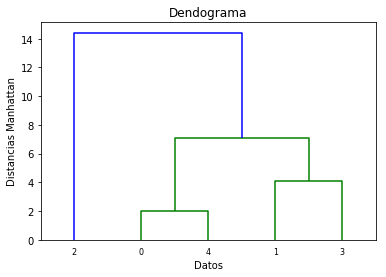

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
import scipy.cluster.hierarchy as graficar

def dis_manh(m):
  dis=[]
  a=0
  for i in range(len(m)):
    
    for k in range(len(m)):
      aux=0
      for j in range(len(m[0])):
        aux=aux+abs(m[k,j]-m[a,j])
      dis.append(aux)
    a=a+1
  return dis

def ordenar(m,dis):
  nuevo=np.zeros((len(m),len(m)))
  s=0  
  for i in range(len(m)):
    for j in range(len(m)):
      nuevo[i][j]=dis[s]
      s=s+1
  return nuevo

def menor(nuevo):
  menor=1000
  fila=0
  columna=0
  for i in range(0,len(nuevo)):
    for j in range(0,i):
      if(i!=j):
        if (nuevo[i][j]<menor):
          menor=nuevo[i][j]
          fila=i
          columna=j
  print("\nEl numero menor es: %f y se encuentra en la fila: %d de la columna: %d" % (menor,fila,columna))
  return fila,columna 


def agrupar(mz,fila,columna):
  mznew=np.zeros((len(mz)-1,len(mz[0])))
  flag=1
  for i in range(len(mznew)):
    for j in range(len(mznew[0])):
      if(i==columna and flag<=2):
        mznew[i,j]=(mz[i,j]+mz[fila,j])/2
        flag=flag+1
      else:
        mznew[i,j]=mz[i,j]
  return mznew
def graficar_dendograma():
  print("\nLa grafica es: ")
  dendrograma = graficar.dendrogram(graficar.linkage(datos, method = "complete"),leaf_rotation=0.,  
          leaf_font_size=8.,  
          show_contracted=True)
  plt.title("Dendograma")
  plt.xlabel("Datos")
  plt.ylabel("Distancias Manhattan")#Distancias Euclideanas
  plt.show()

################################################################################################################
datos = pd.read_csv("ejem.csv", sep=';')
mz=np.array((datos))
print(mz)
iteracion=1
x=dis_manh(mz)
x1=ordenar(mz,x)
print("\n Matriz distancia \n",x1)
fil,col=menor(x1)
new=agrupar(mz,fil,col)
print("\nIteración #",iteracion)
print("La nueva matriz es:  \n",new)

while(len(new)!=1):
  iteracion=iteracion+1
  x=dis_manh(new)
  x1=ordenar(new,x)
  print("\n Matriz distancia \n",x1)
  fil,col=menor(x1)
  new=agrupar(new,fil,col)
  print("\nIteración #",iteracion)
  print(" La nueva matriz es: \n",new)

graficar_dendograma()

El codigo de Kmens lo probe con otros datos 

In [21]:
import pandas as pd
import numpy as np
import random as rd
import math as m
import matplotlib.pyplot as plt

def dis_eucli(kn,matriz,cen):
  a=0
  for k in range(kn):
    for i in range(len(matriz)):
      aux=0
      for j in range(len(matriz[0])):
        aux=aux + (matriz[i,j]-cen[a,j])**2
        dis[k,i]=(aux)**0.5
    a=a+1    
  return dis

def dis_manh(kn,matriz,cen):
  a=0
  for k in range(kn):
    for i in range(len(matriz)):
      aux=0
      for j in range(len(matriz[0])):
        aux=aux + abs(matriz[i,j]-cen[a,j])
      dis[k,i]=aux
    a=a+1    
  return dis

def num_menor(dis):
  m = len(dis)
  n = len(dis[0])
  dis2=dis
  #buscar el numero menor
  list2 = []  
  for col in range(n):  
    col_max = dis[0][col]  
    for row in range(1, m):  
      col_max = min(col_max, dis[row][col]) 
    list2.append(col_max)
  b=0
  #remplazar el menor por un 1 y al mor por 0
  for c in range(len(dis[0])):
    for z in range(len(dis)):
      if(dis[z,b]==list2[b]):
        dis2[z,b]=1
      else:
        dis2[z,b]=0
  
    b=b+1
  return dis2

def nu_centroide(matriz,dis2,cenew):
  cn=np.transpose(matriz)
  #print("\nmatriz traspu\n",cn)
  cw=[]
  b=0  
  for q in range(kn):  
    for i in range(len(cn)):
      aux=0
      for j in range(len(cn[0])):
        if(dis2[b,j]==1):
          aux=aux+cn[i,j]        
          con=np.count_nonzero(dis2[b])
      cw.append(aux/con)        
        
    b=b+1 
  s=0
  for i in range(kn):
    for j in range(len(matriz[0])):
      nuevo[i][j]=cw[s]
      s=s+1
  return nuevo

def comparar(c1,c2):
  flag=True
  for i in range(len(c1)):
    for j in range(len(c1[0])):
      if(c1[i][j]!=c2[i][j]):
        flag=False
  return flag
 
####################################################
datos=pd.read_csv("xclara.csv", sep=',')
matriz=np.array(datos)
kn=int(input("Digite el numero de K:(solo puede ingresar # 2) ")) 
dis=np.zeros((kn,len(matriz)))
c=np.zeros((kn,len(matriz[0])))
nuevo=np.zeros((kn,len(matriz[0])))

print("Matriz de datos\n",matriz)

for i in range(len(c)):
  for j in range(len(matriz[0])):
    c[i,j]=rd.randrange(1,100)
#print("\n centroides\n",c)

print("\n Centroides iniciales\n",c)

m= dis_manh(kn,matriz,c)
print("\n Matriz Distancia",m)

menor= num_menor(m)
print("\n",menor)

siguiente= nu_centroide(matriz,menor,nuevo)
#print("\n",siguiente)
anterior=c
contador=1
while(comparar(anterior,siguiente)!=True):
   
  m= dis_manh(kn,matriz,siguiente)
  #print(m)
  menor= num_menor(m)
  #print(menor)  
  anterior=siguiente
  siguiente= nu_centroide(matriz,menor,nuevo)
  contador=contador+1 

print("\n Los centroides son: \n",siguiente)


Digite el numero de K:(solo puede ingresar # 2) 3
Matriz de datos
 [[ 1.000000e+00  2.072345e+00 -3.241693e+00]
 [ 2.000000e+00  1.793671e+01  1.578481e+01]
 [ 3.000000e+00  1.083576e+00  7.319176e+00]
 ...
 [ 2.998000e+03  6.446532e+01 -1.050136e+01]
 [ 2.999000e+03  9.072282e+01 -1.225584e+01]
 [ 3.000000e+03  6.487976e+01 -2.487731e+01]]

 Centroides iniciales
 [[ 7. 79.  9.]
 [87.  1. 69.]
 [71. 25. 73.]]

 Matriz Distancia [[  95.169348   72.8481     83.597248 ... 3025.03604  3024.97866
  3040.99755 ]
 [ 159.314038  155.1519    145.7644   ... 3053.96668  3082.97866
  3070.75707 ]
 [ 169.169348  133.27848   157.597248 ... 3049.96668  3078.97866
  3066.75707 ]]

 [[1. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

 Los centroides son: 
 [[2480.49423077   67.41288218   -3.94013334]
 [ 476.52941176   11.35422136   13.25682715]
 [1456.4781746    40.5907332    59.5869666 ]]
